In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

get_ipython().magic(u'matplotlib inline')
import seaborn
import numpy
import scipy
import matplotlib.pyplot as plt
import pandas
import IPython.display as ipd
import librosa
import librosa.display
import random
import numpy as np
from numpy import dot as matrixmultiply
from scipy.signal import hilbert, chirp
from scipy import signal, stats
plt.rcParams['figure.figsize'] = (13, 5)



In [3]:
# carregar amostra original

(x, sr) = librosa.load('Huey Lewis and The News - I Want a New Drug.wav'
                       )  # x = a matriz de áudio e sr=taxa de amostragem
ipd.Audio(x, rate=sr)

In [4]:
# Extrair componente de percussão

x_percussive = librosa.effects.percussive(x, margin=7.0)
ipd.Audio(x_percussive, rate=sr)


In [5]:
# primeiro, fixar parâmetros STFT

hop_length = 512
n_fft = 2048

# Calcuar STFT

S = librosa.stft(x_percussive, n_fft=n_fft, hop_length=hop_length)

# Espectograma

X = abs(S) ** 2  # obter magnitude do espectograma

1025 481
1


/home/hosana/.local/lib/python2.7/site-packages/scipy/signal/signaltools.py:1593: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  h = h[ind]
/home/hosana/.local/lib/python2.7/site-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


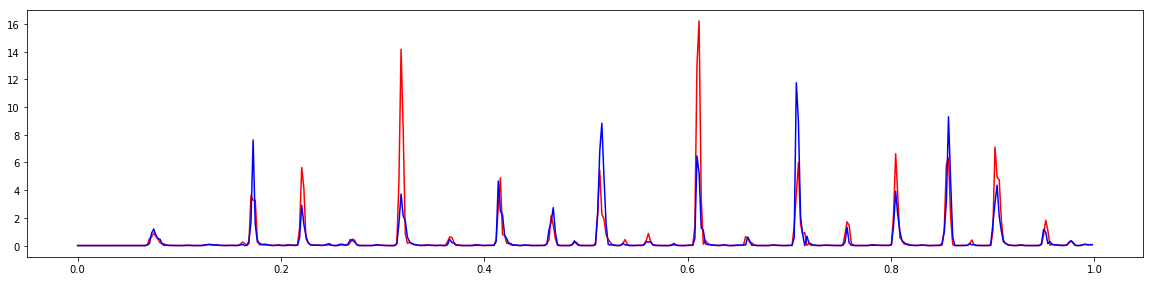

2


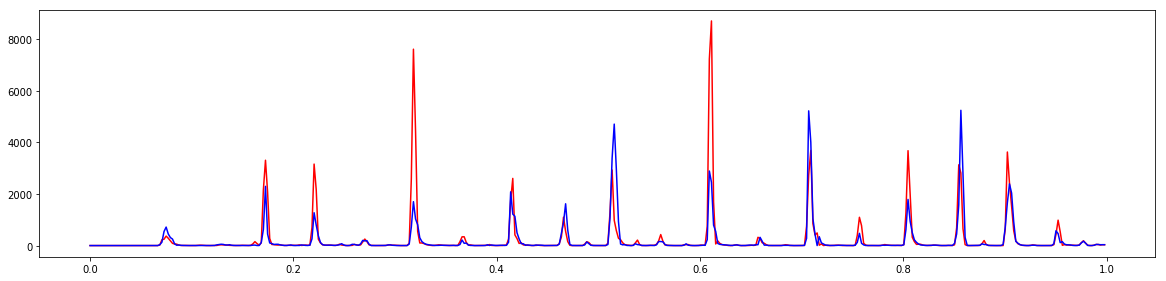

3


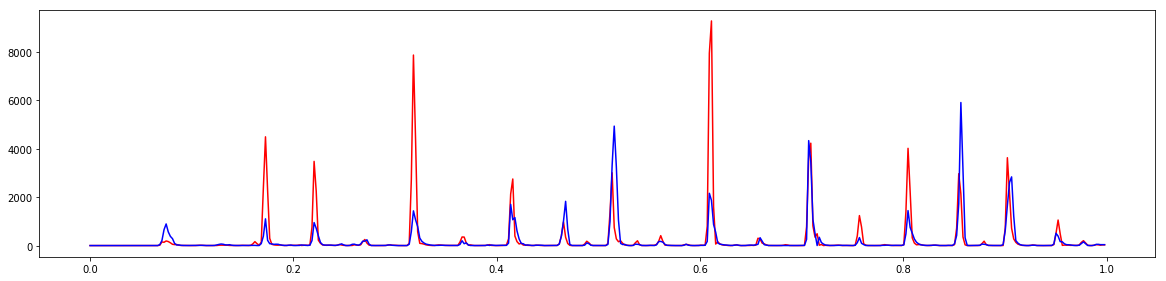

4


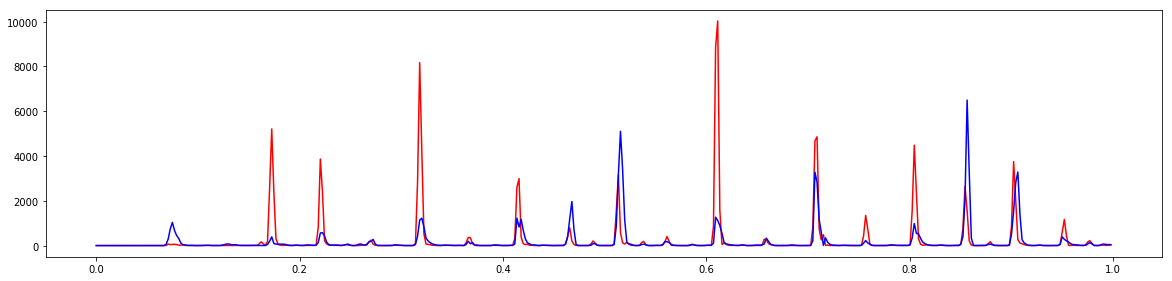

5


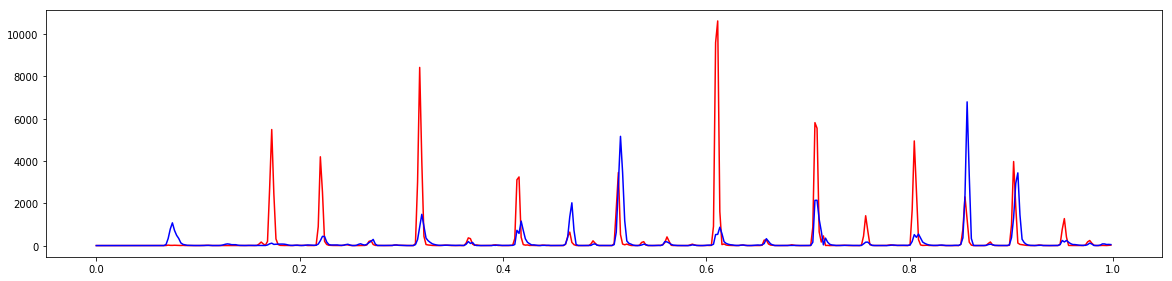

6


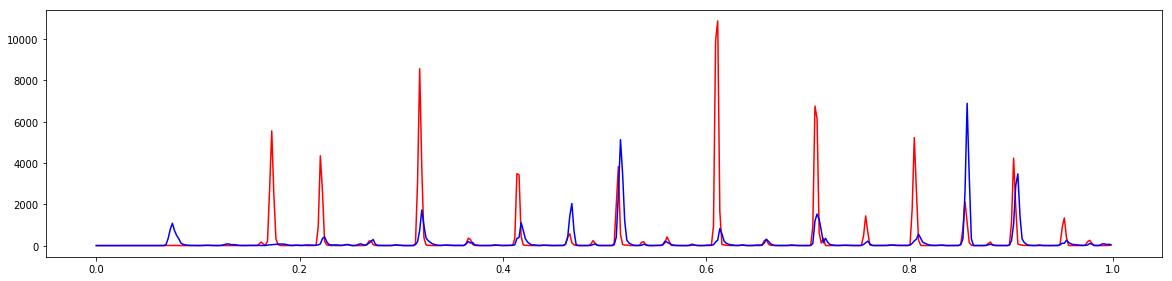

7


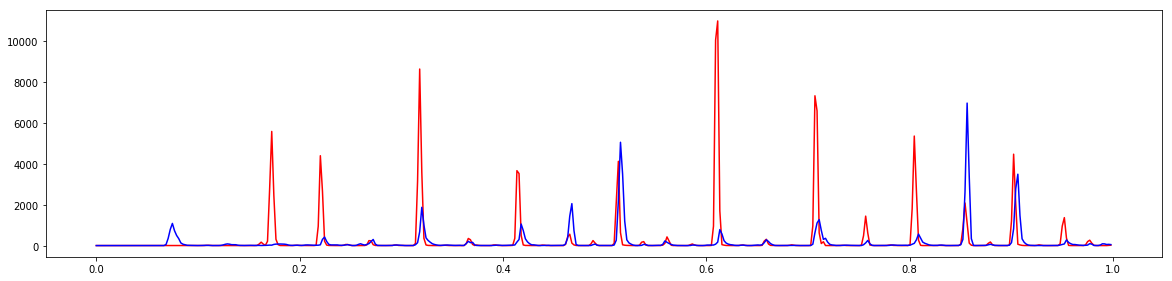

8


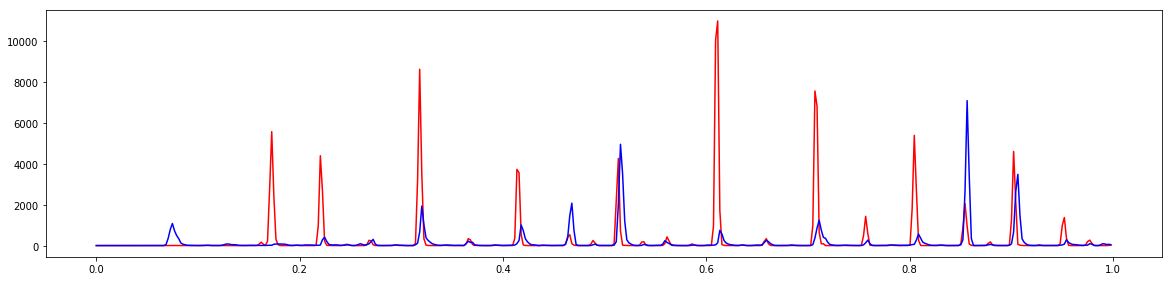

9


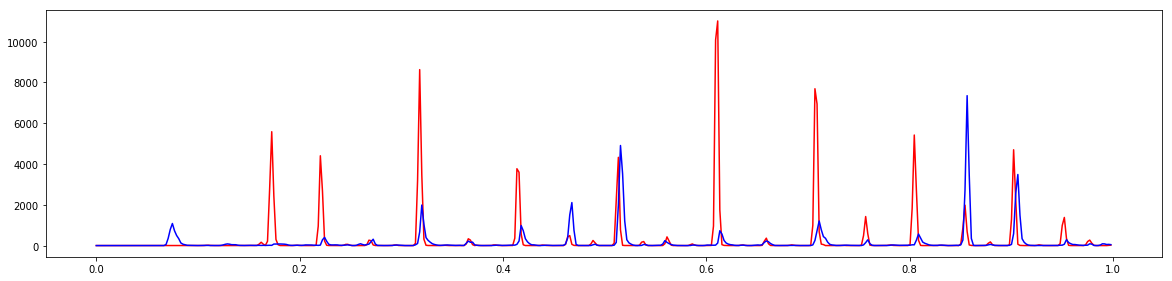

10


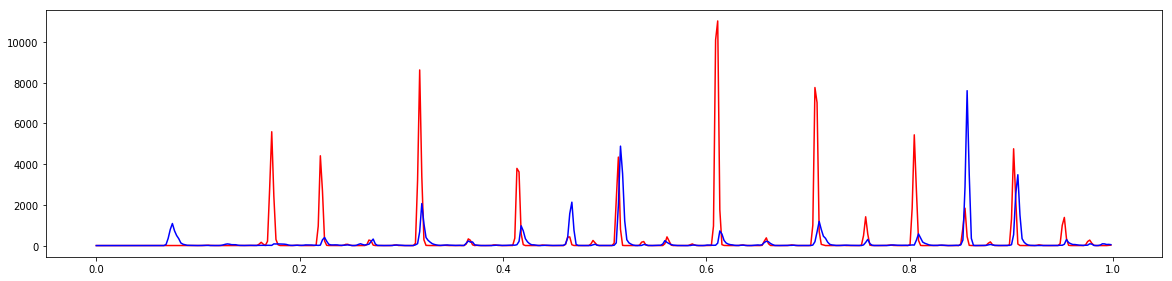

11


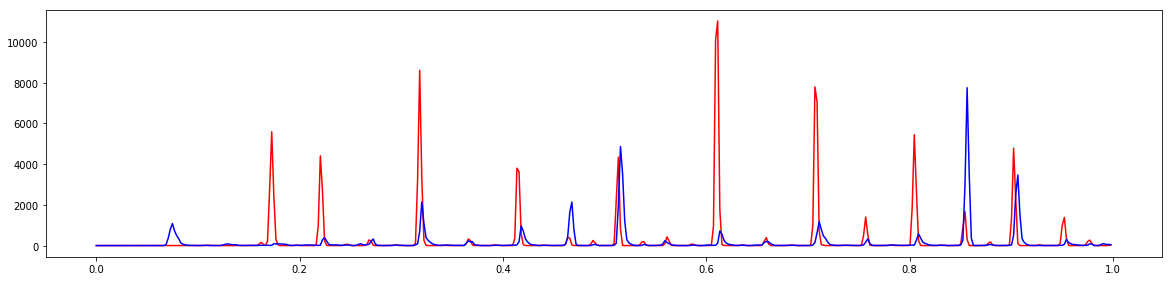

12


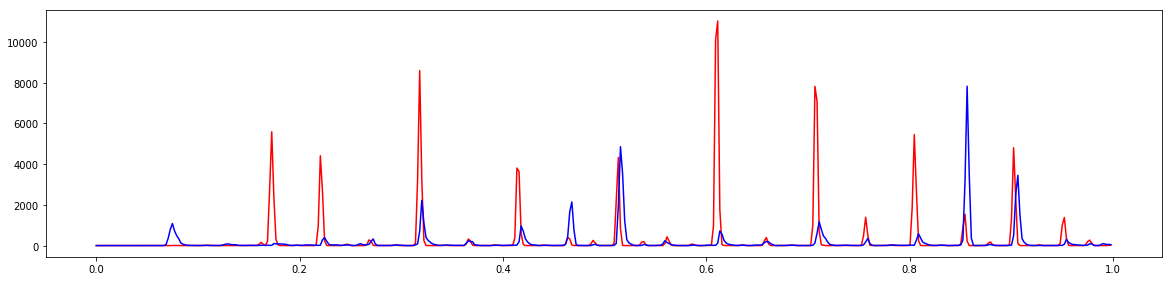

13


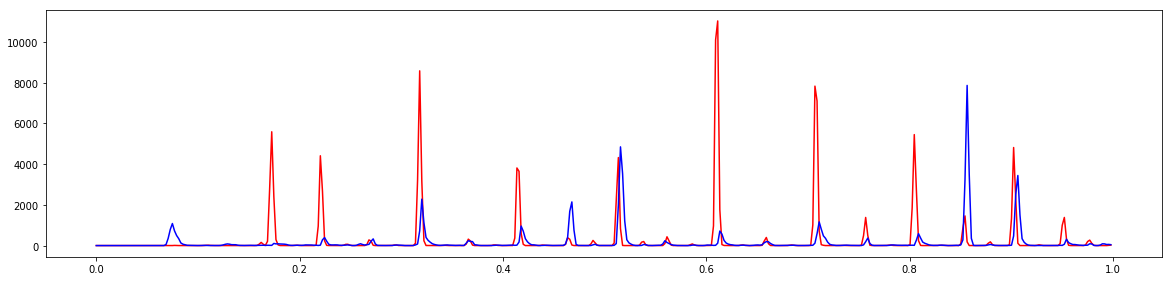

14


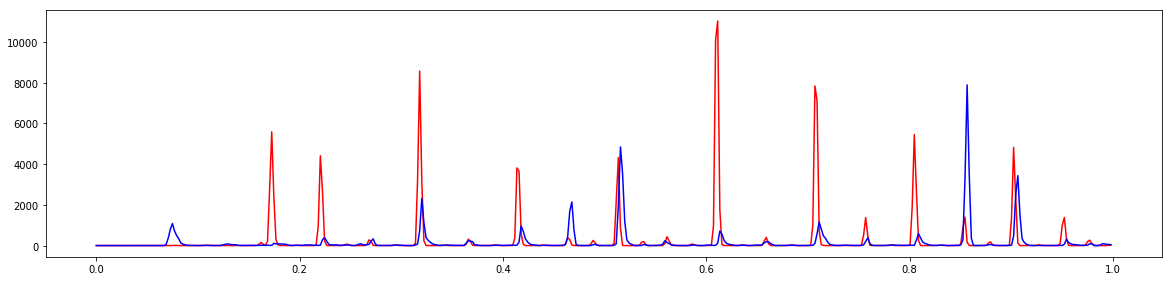

15


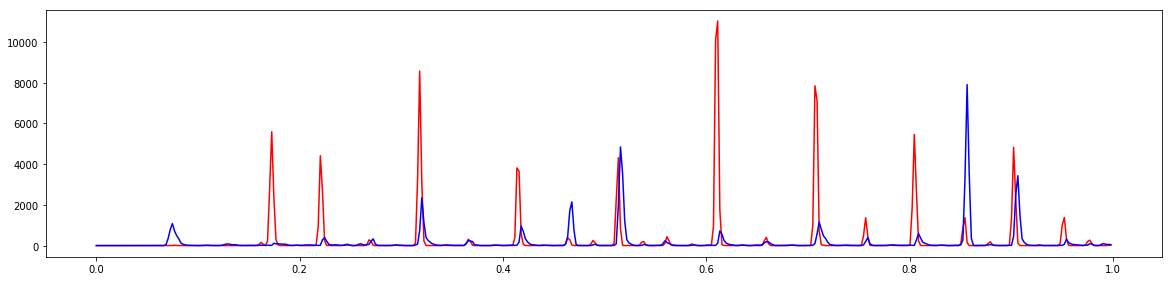

16


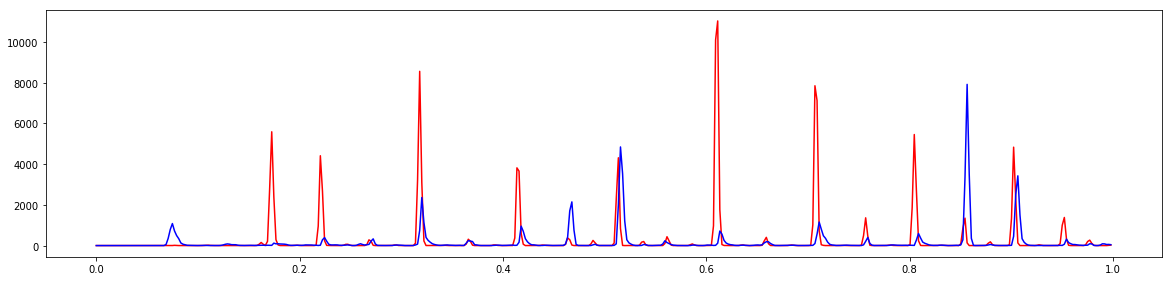

17


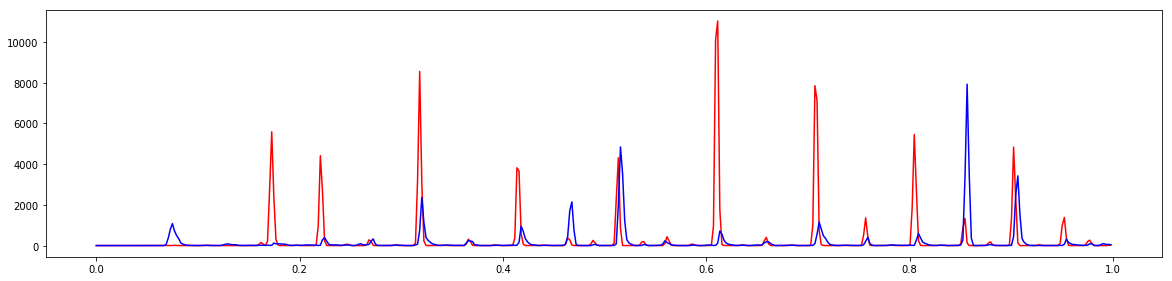

18


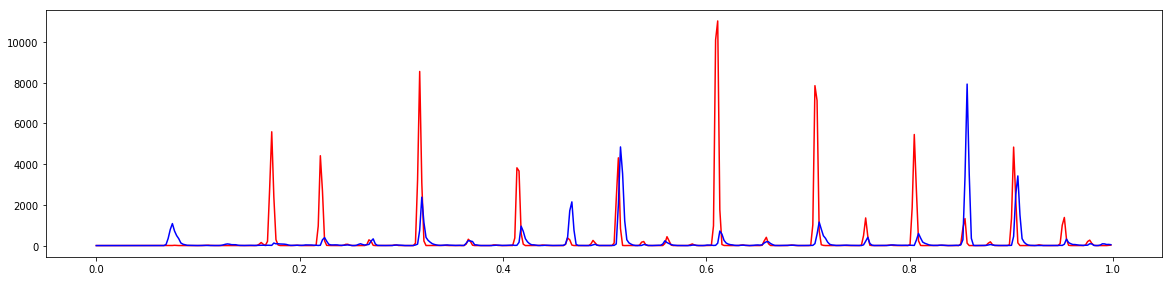

19


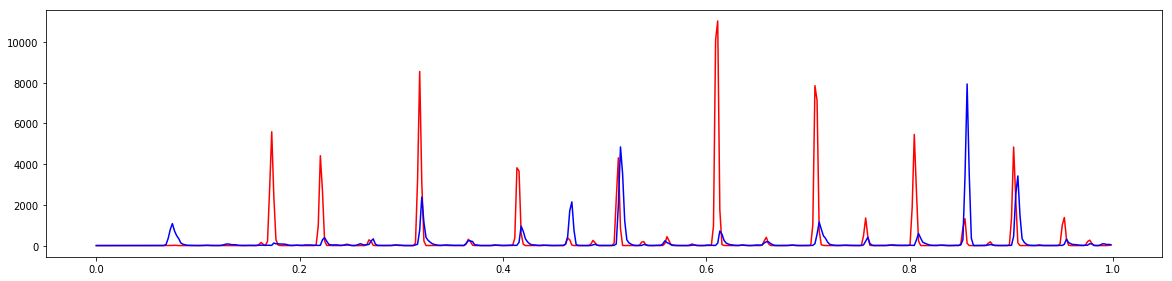

20


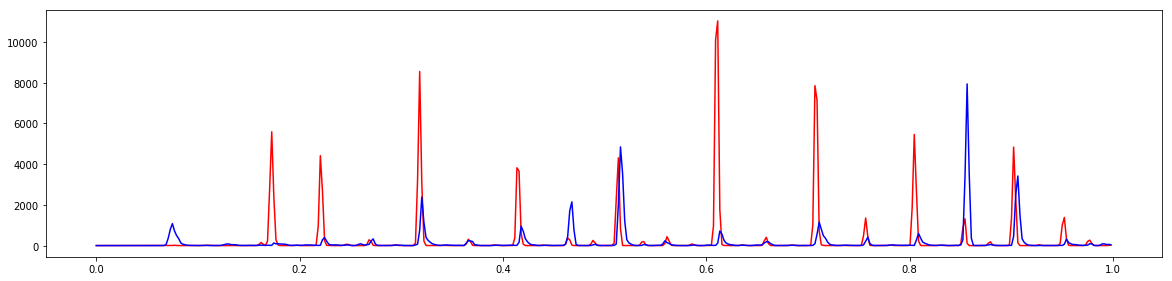

21


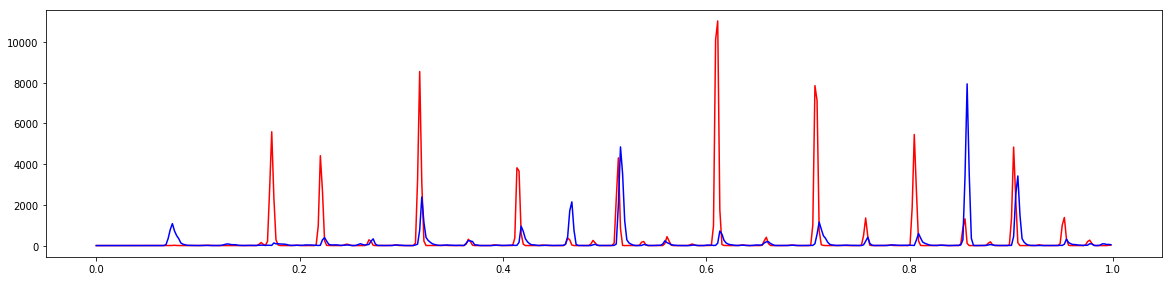

22


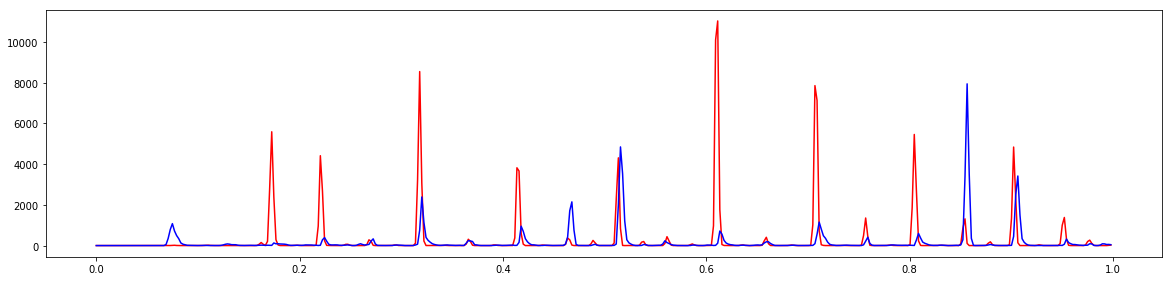

23


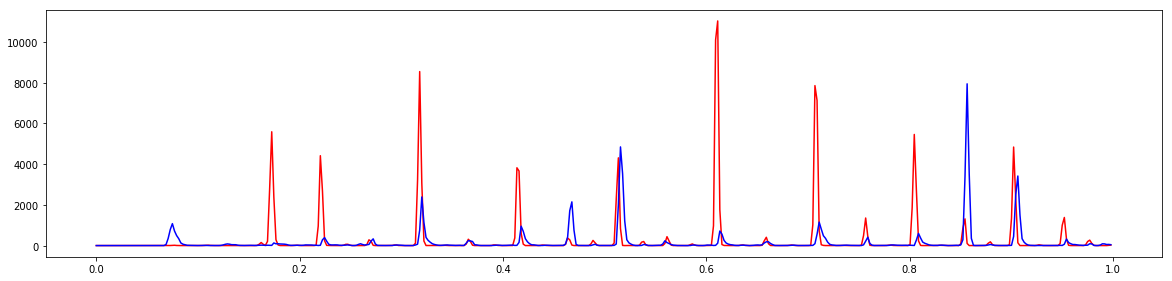

24


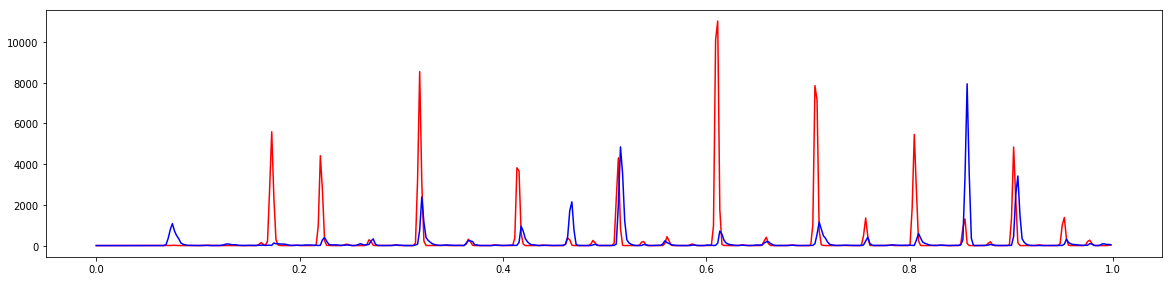

25


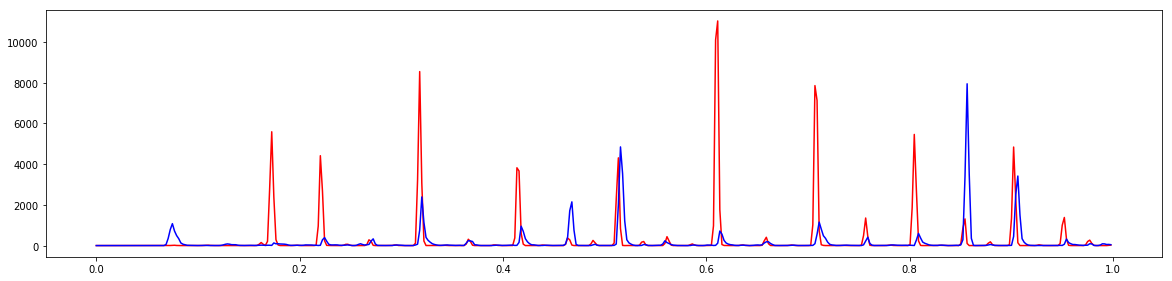

26


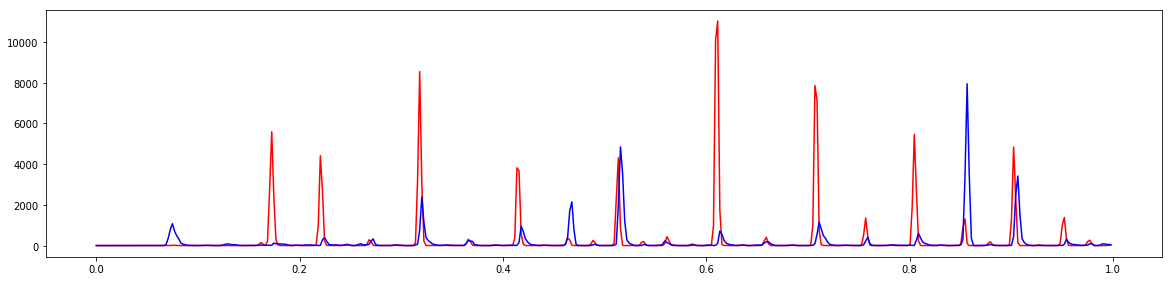

27


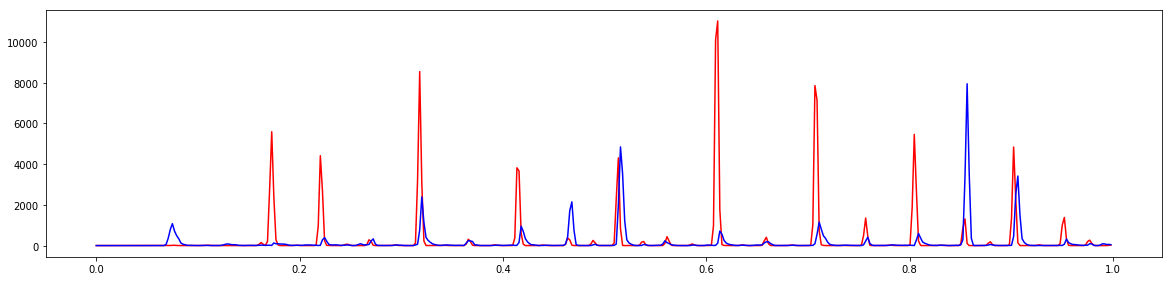

28


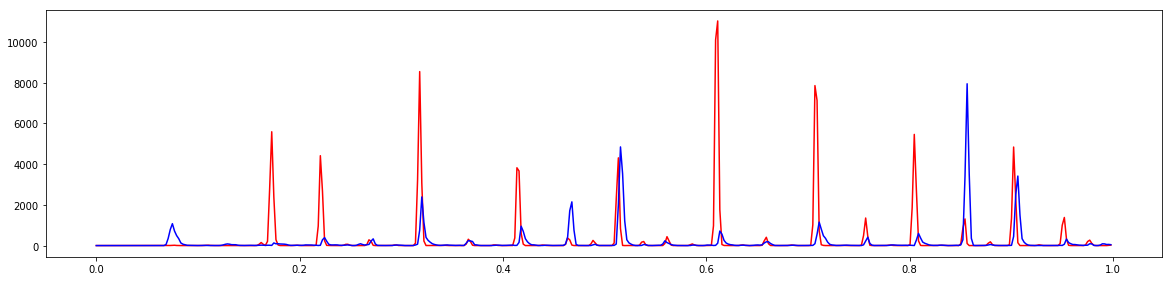

29


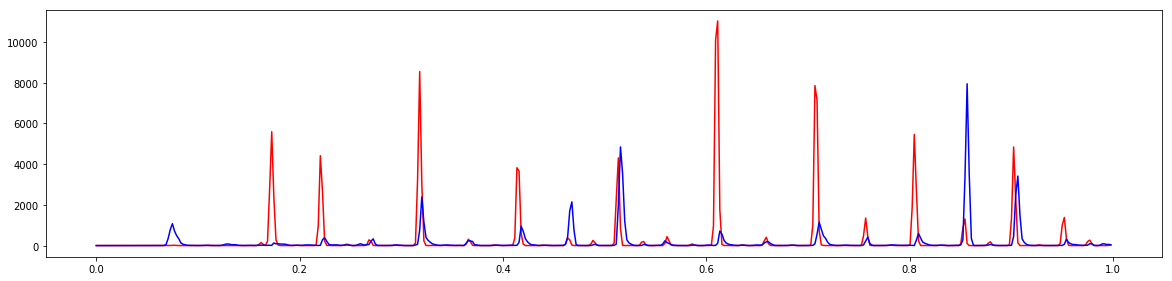

In [6]:
# definir parâmetros NMF

numComp = 2  # número de componentes
numIter = 30  # n de interaçõesnumBins, numFrames = X.shape
(numBins, numFrames) = X.shape
print numBins, numFrames  # linhas, colunas

# primeiro, o treinamento NMF no espectrograma da amostra original
# inicializar

B = np.random.rand(numBins, numComp)  # matriz
G = np.random.rand(numComp, numFrames)  # matriz
OnesMat = numpy.ones((numBins, numFrames), dtype=np.float)  # cria uma matriz numBis X numFrames de 1's

for it in range(1, numIter):
    print it
    Xtilde = np.spacing(1) + matrixmultiply(B, G)  #    Xtilde =  eps + matrixmultiply (B,G)
    Xratio = X / Xtilde
    Blinha = B.conj().transpose()
    G = G * matrixmultiply(Blinha, Xratio) / matrixmultiply(Blinha,OnesMat)
    Xtilde = np.spacing(1) + matrixmultiply(B, G)
    Xratio = X / Xtilde
    Glinha = G.conj().transpose()
    B = B * matrixmultiply(Xratio, Glinha) / matrixmultiply(OnesMat,Glinha)
    normB = np.spacing(1) + B.sum(axis=0)
    B = np.multiply(B, 1 / normB)

     # Plotar as componentes NFM

    duration = 1.0
    fs = 481.0
    samples = int(fs * duration)
    t = np.arange(samples) / fs

    analytic_signal = hilbert(Glinha)
    amplitude_envelope = np.abs(analytic_signal)
    fig = plt.figure(figsize=(20, 10))
    ax0 = fig.add_subplot(211)
    plt.gca().set_color_cycle(['red', 'blue', 'green'])
    ax0.plot(t, amplitude_envelope)


    plt.savefig('ultimaIterOriginalLewis.png')
    plt.show()

/home/hosana/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  # This is added back by InteractiveShellApp.init_path()


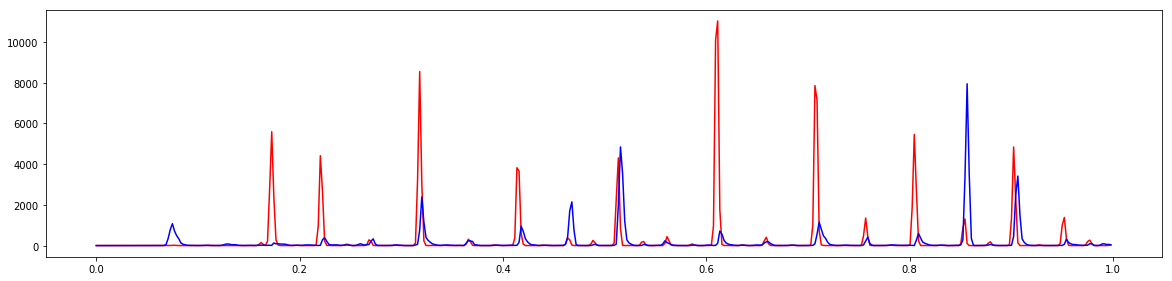

In [7]:
# Plotar as componentes NFM

duration = 1.0
fs = 481.0
samples = int(fs * duration)
t = np.arange(samples) / fs
analytic_signal = hilbert(Glinha)
amplitude_envelope = np.abs(analytic_signal)
fig = plt.figure(figsize=(20, 10))
ax0 = fig.add_subplot(211)
plt.gca().set_color_cycle(['red', 'blue', 'green'])
ax0.plot(t, amplitude_envelope)



plt.show()


/home/hosana/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  


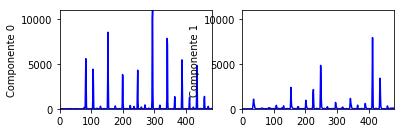

In [8]:
# Plotar componentes separadas amostra original

plt.figure()
for n in range(numComp):
    plt.subplot(numpy.ceil(numComp), 2, n + 1)
    plt.gca().set_color_cycle(['blue'])
    plt.plot(G[n])
    plt.ylim(0, G.max())
    plt.xlim(0, G.shape[1])
    plt.ylabel('Componente %d' % n)
    plt.savefig('lewiscomp.png')
G1 = G

reconstructed_signal = scipy.zeros(len(x_percussive))
for n in range(numComp):
    Y = scipy.outer(B[:, n], G[n]) * numpy.exp(1j * numpy.angle(S))
    y = librosa.istft(Y)
    reconstructed_signal[:len(y)] += y
    ipd.display(ipd.Audio(y, rate=sr))

In [9]:
# carregar amostra suspeita

(a, sr) = librosa.load('Ray Parker Jr. - Ghostbusters.wav')  # x = a matriz de áudio e sr=taxa de amostragem
ipd.Audio(a, rate=sr)


In [10]:
# Extrair componente de percussão

a_percussive = librosa.effects.percussive(a, margin=7.0)

# carregar amostra suspeita

ipd.Audio(a_percussive, rate=sr)

1


/home/hosana/.local/lib/python2.7/site-packages/ipykernel_launcher.py:56: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


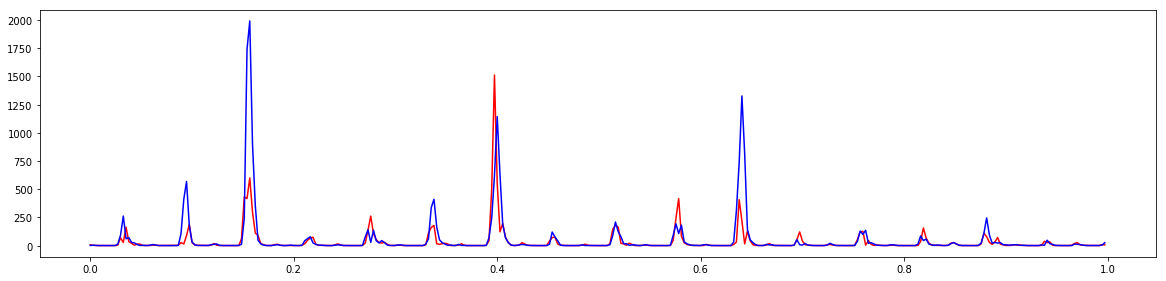

2


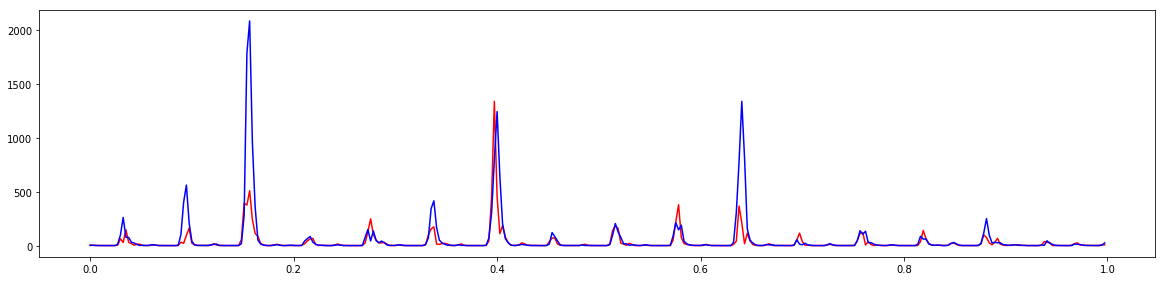

3


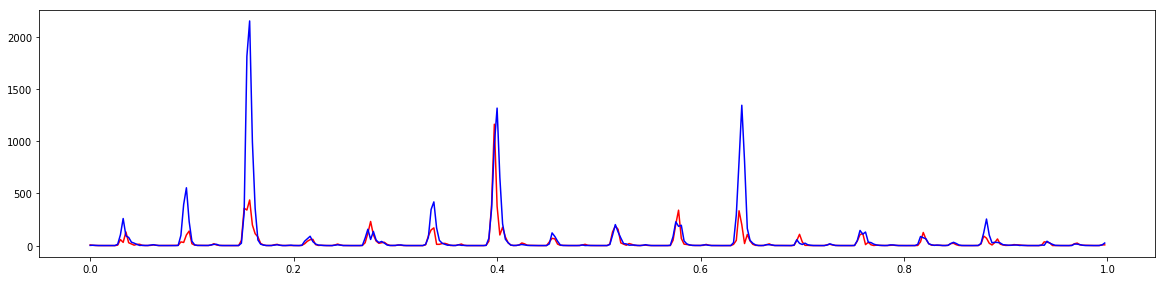

4


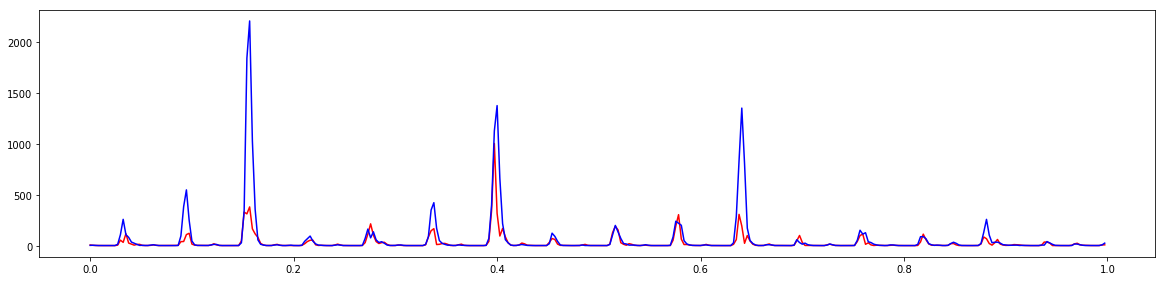

5


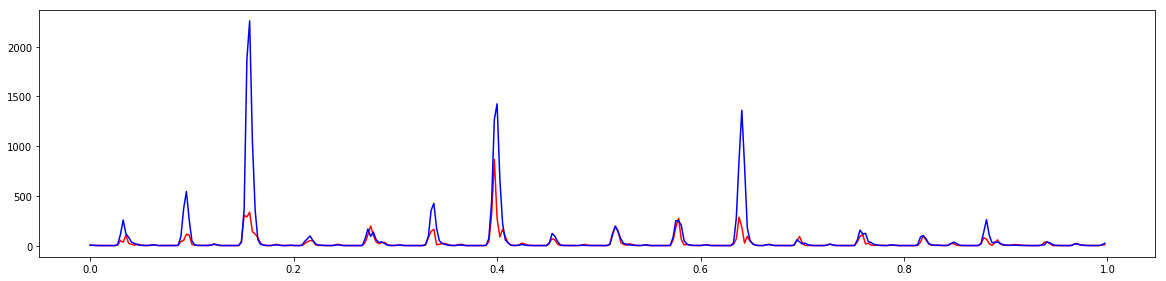

6


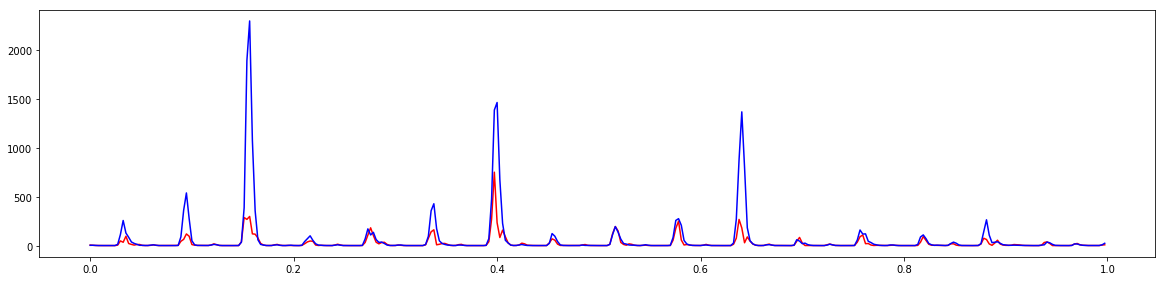

7


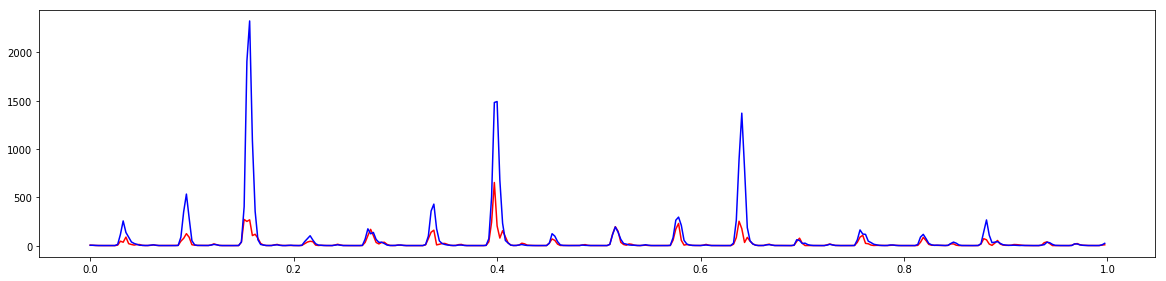

8


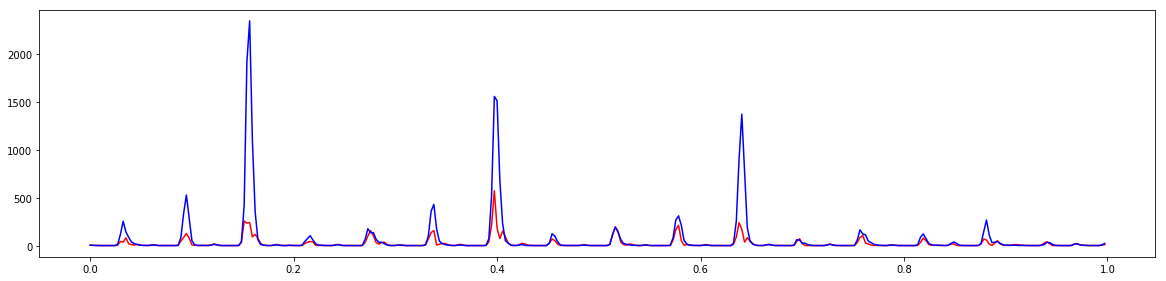

9


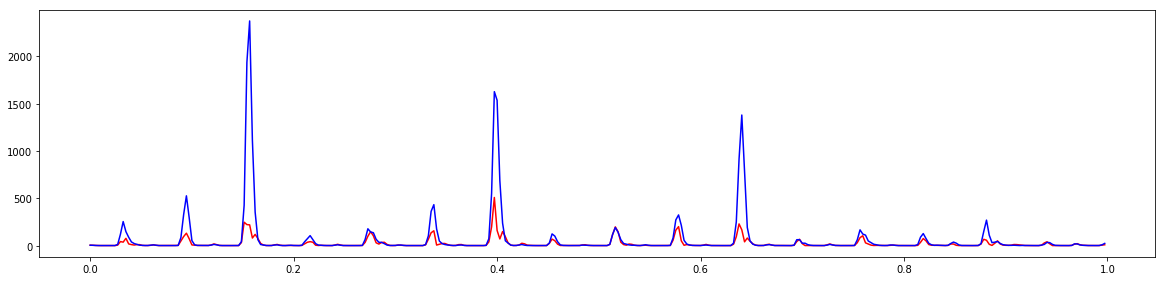

10


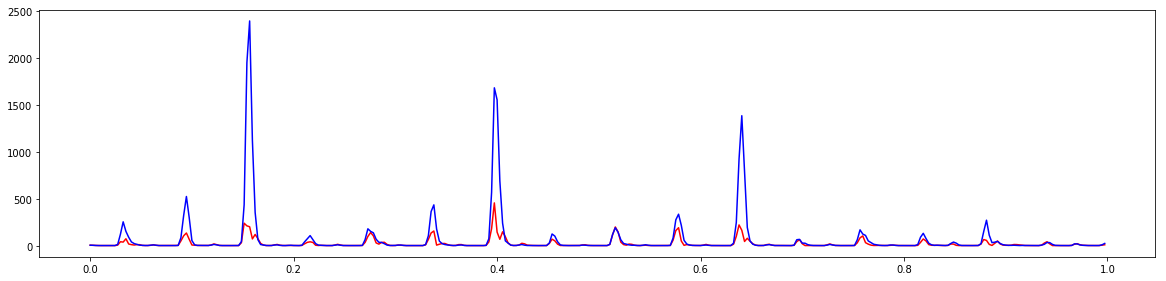

11


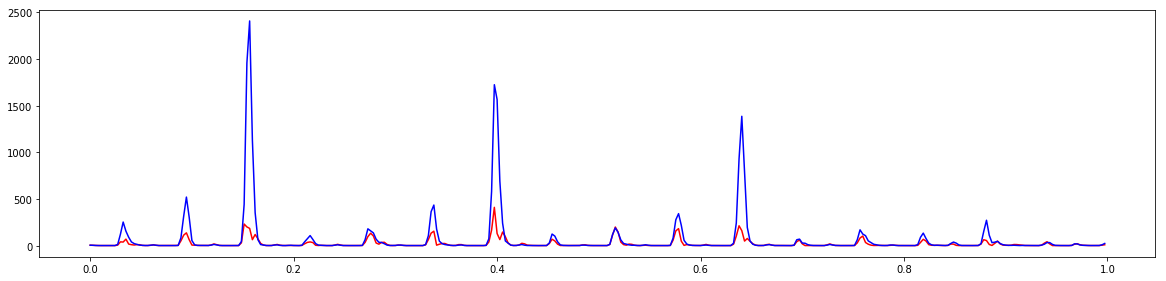

12


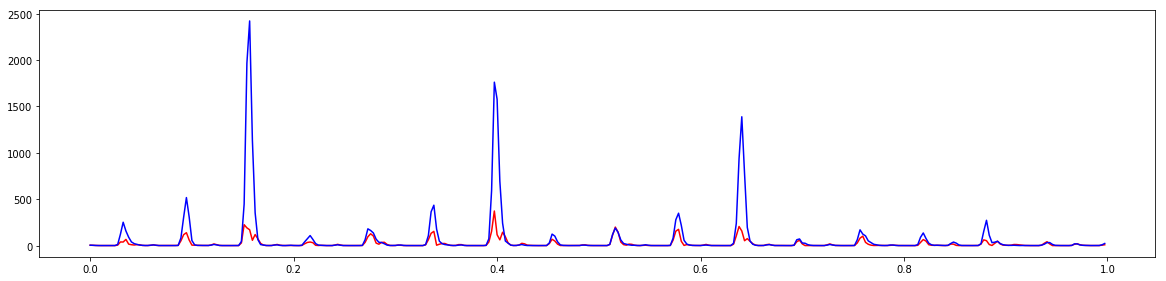

13


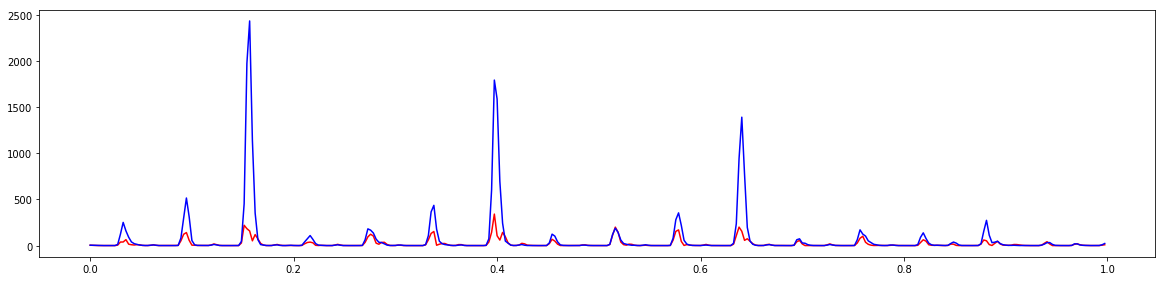

14


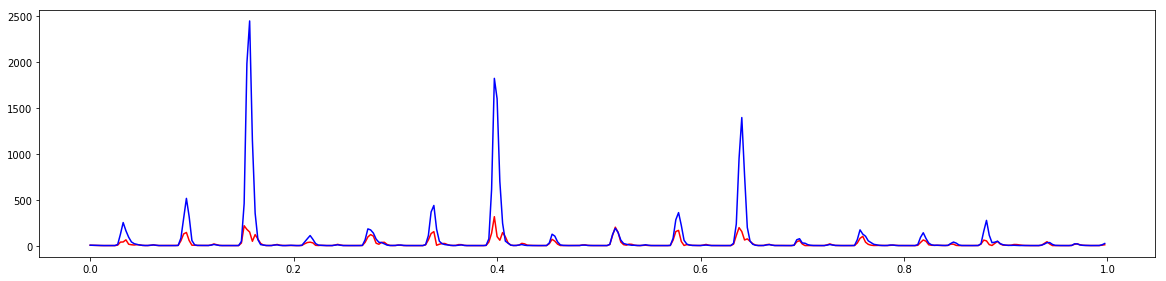

15


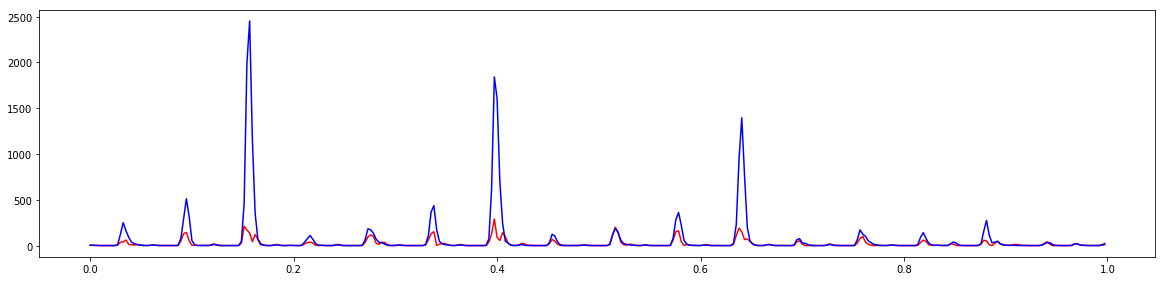

16


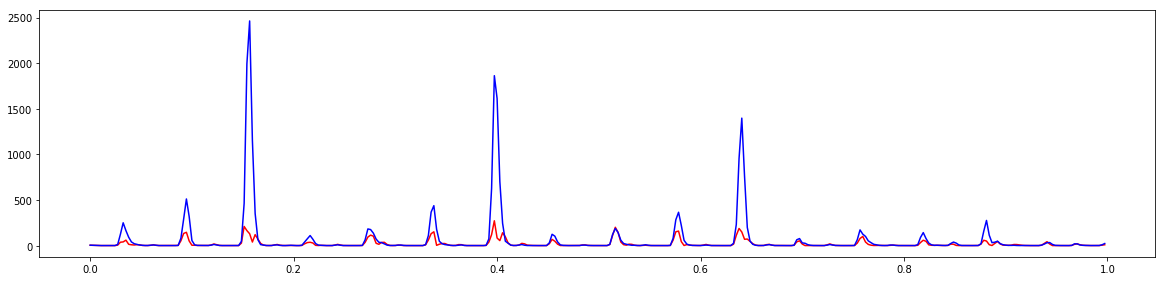

17


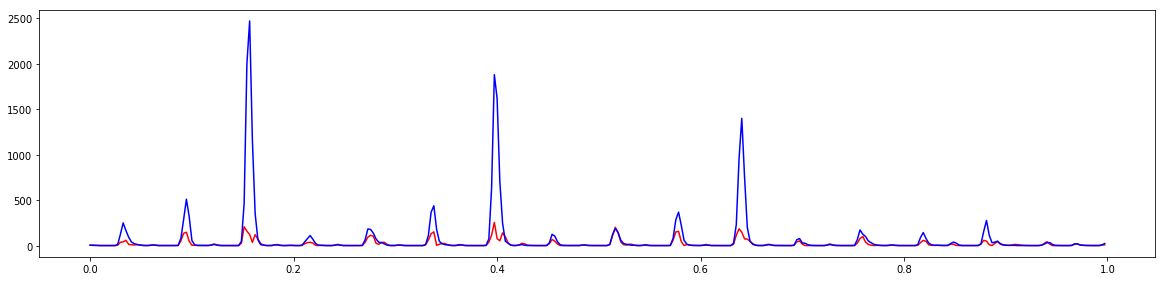

18


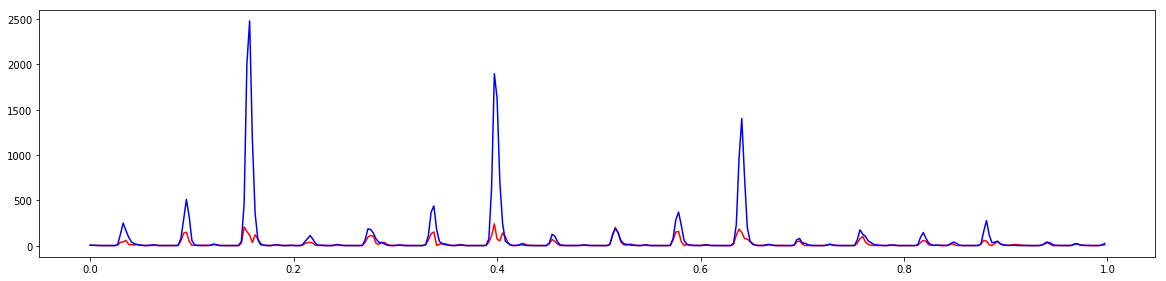

19


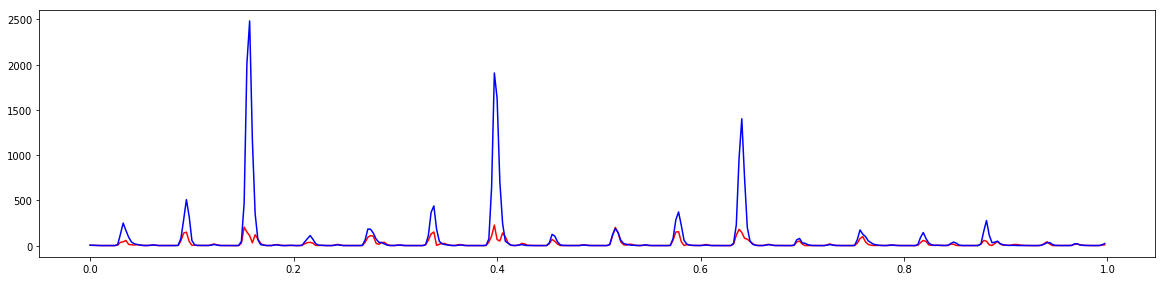

20


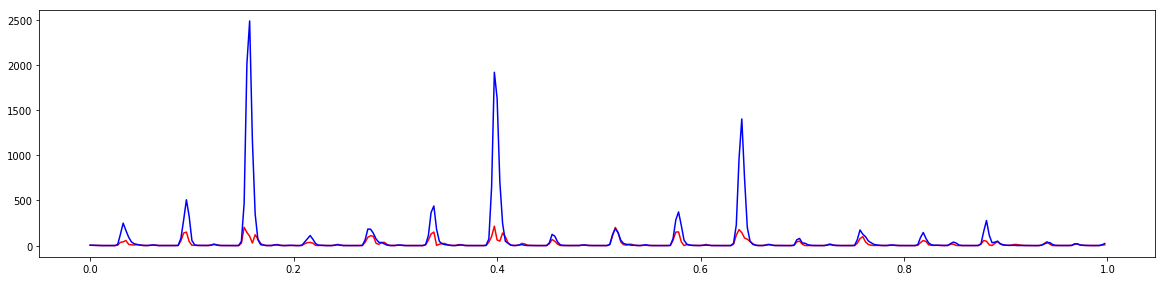

21


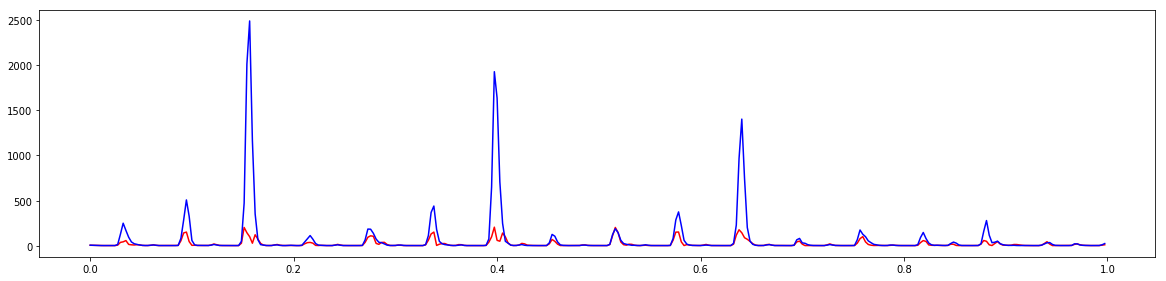

22


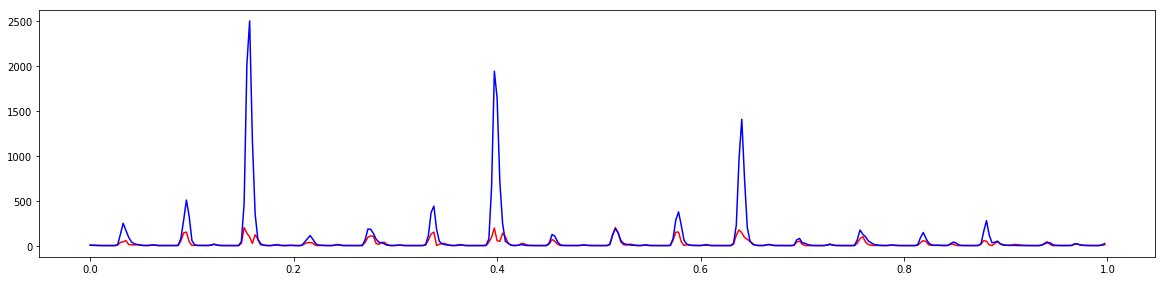

23


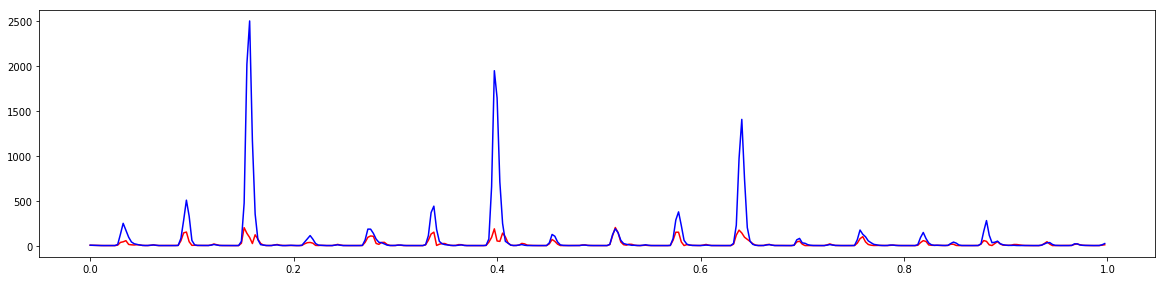

24


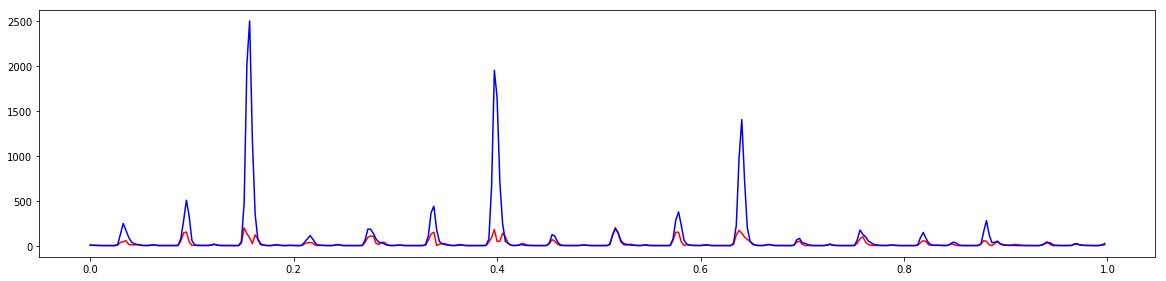

25


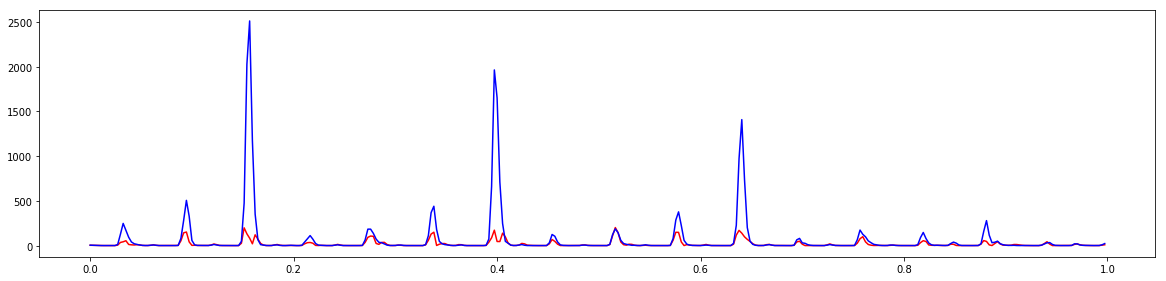

26


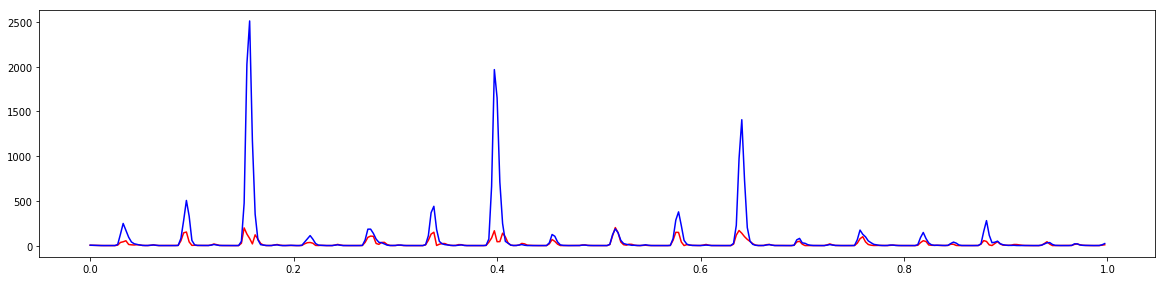

27


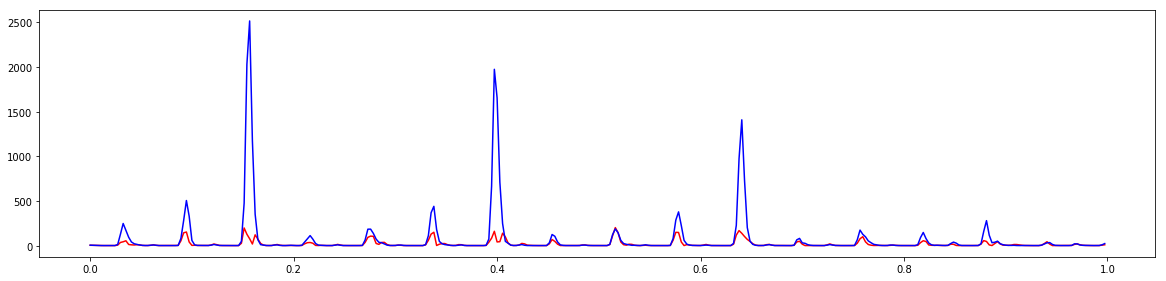

28


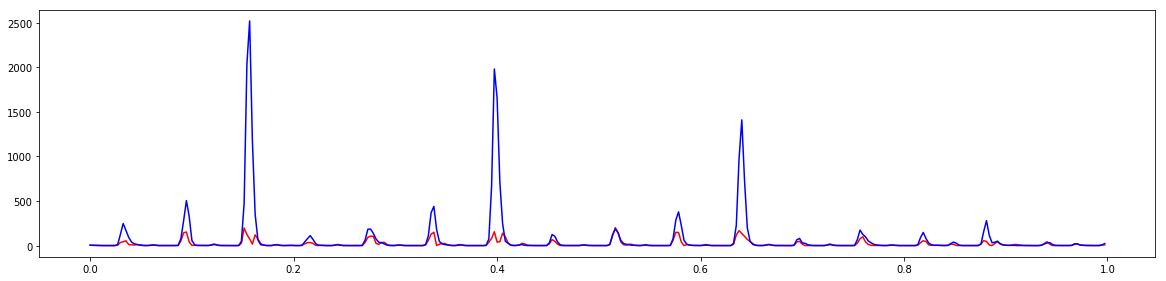

29


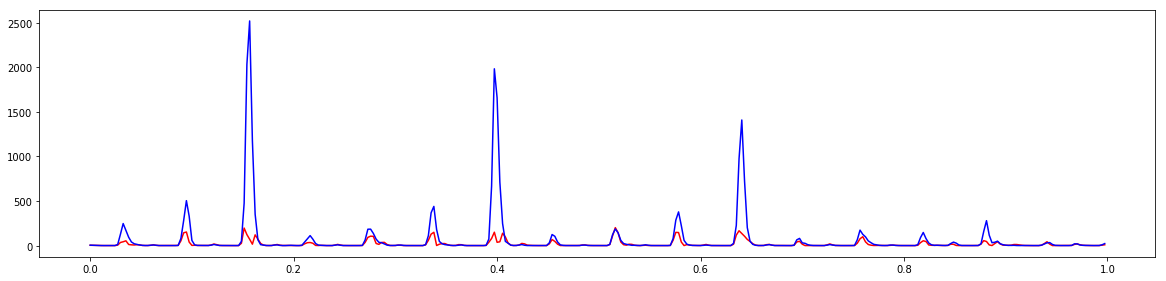

In [15]:
# Em seguida, repare os modelos aprendidos e aplique-os ao suspeito de plágio mais alguns componentes extras

storeB = B
numCompFixed = numComp

# numComp = 2;

# Calcuar STFT

S = librosa.stft(a_percussive, n_fft=n_fft, hop_length=hop_length)

# Espectograma

X = abs(S) ** 2  # obter magnitude do espectograma


(numBins, numFrames) = X.shape

B = np.random.rand(numBins, numComp)  # matriz
G = np.random.rand(numComp, numFrames)  # matriz
OnesMat = numpy.ones((numBins, numFrames), dtype=np.float)  # cria uma matriz numBis X numFrames de 1's

# inicializar os primeiros modelos com os que já foram aprendidos

B[:, 0:numCompFixed] = storeB

for it in range(1, numIter):
    print it
    Xtilde = np.spacing(1) + matrixmultiply(B, G)  
    Xratio = X / Xtilde
    Blinha = B.conj().transpose()  # ativações de atualização
    G = G * matrixmultiply(Blinha, Xratio) / matrixmultiply(Blinha,OnesMat)
    Xtilde = np.spacing(1) + matrixmultiply(B, G)
    Xratio = X / Xtilde
    Glinha = G.conj().transpose()
    B = B * matrixmultiply(Xratio, Glinha) / matrixmultiply(OnesMat,Glinha)

    B[:, 0:numCompFixed] = storeB
    normB = np.spacing(1) + B.sum(axis=0)
    B = np.multiply(B, 1 / normB)
    
    
    # Plotar as componentes NFM

    duration = 1.0
    fs = 370.0
    samples = int(fs * duration)
    t = np.arange(samples) / fs
    analytic_signal = hilbert(Glinha)
    amplitude_envelope = np.abs(analytic_signal)
    fig = plt.figure(figsize=(20, 10))
    ax0 = fig.add_subplot(211)

        

    plt.gca().set_color_cycle(['red', 'blue', 'green'])
    ax0.plot(t, amplitude_envelope)
    plt.savefig('ultimaIterPlagioray1.png')
    plt.show()

/home/hosana/.local/lib/python2.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  # This is added back by InteractiveShellApp.init_path()


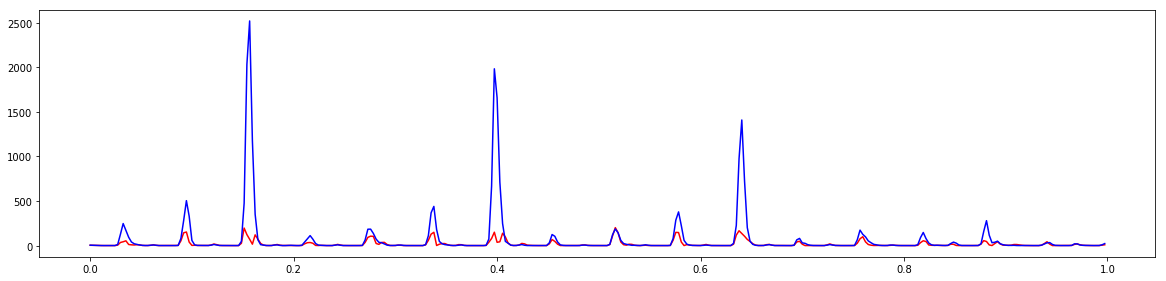

In [16]:
# Plotar as componentes NFM

duration = 1.0
fs = 370.0
samples = int(fs * duration)
t = np.arange(samples) / fs
analytic_signal = hilbert(Glinha)
amplitude_envelope = np.abs(analytic_signal)
fig = plt.figure(figsize=(20, 10))
ax0 = fig.add_subplot(211)
plt.gca().set_color_cycle(['red', 'blue', 'green'])
ax0.plot(t, amplitude_envelope)
plt.show()

/home/hosana/.local/lib/python2.7/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.
  


(2, 370)


/home/hosana/.local/lib/python2.7/site-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning: The set_color_cycle function was deprecated in version 1.5. Use `.set_prop_cycle` instead.


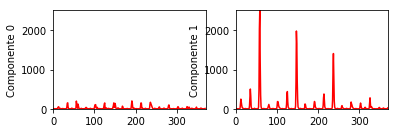

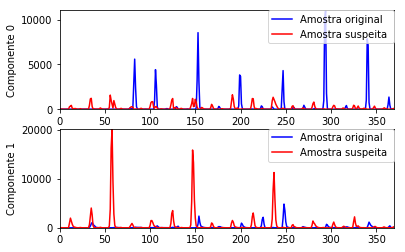

In [17]:
# Plotar componentes separadas amostra suspeita

plt.figure()
for n in range(numComp):
    plt.subplot(numpy.ceil(numComp), 2, n + 1)
    plt.gca().set_color_cycle(['red'])
    plt.plot(G[n])
    plt.ylim(0, G.max())
    plt.xlim(0, G.shape[1])
    plt.ylabel('Componente %d' % n)
    plt.savefig('raycomp.png')

reconstructed_signal = scipy.zeros(len(a_percussive))
for n in range(numComp):
    Y = scipy.outer(B[:, n], G[n]) * numpy.exp(1j * numpy.angle(S))
    y = librosa.istft(Y)
    reconstructed_signal[:len(y)] += y
    ipd.display(ipd.Audio(y, rate=sr))

plt.figure()
print G.shape
for n in range(numComp):
    plt.subplot(numpy.ceil(numComp), 1, n + 1)
    plt.gca().set_color_cycle(['blue', 'red'])
    plt.plot(G1[n], label='Amostra original')
    plt.plot(G[n] * 8, label='Amostra suspeita ')
    plt.ylim(0, max(G1[n].max(), (G[n] * 8).max()))
    plt.xlim(0, G.shape[1])
    plt.legend(bbox_to_anchor=(1.0, 1), loc=1, borderaxespad=0.)
    plt.ylabel('Componente %d' % n)
    plt.savefig('lewiseraycomp.png')


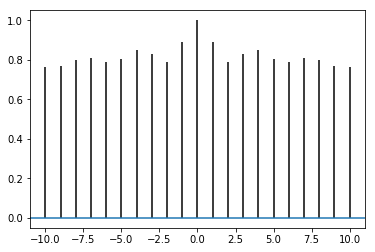

In [19]:
# Autocorrelação amostra original

(fig, axes) = plt.subplots(nrows=1)
acorr_results = axes.acorr(x_percussive)  # autocorrelation
r_source = acorr_results[1]
plt.savefig('correlacao_originallewis.png')

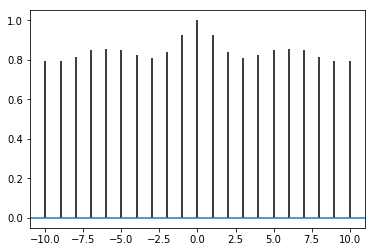

In [20]:
# Autocorrelação amostra suspeita

(fig, axes) = plt.subplots(nrows=1)
acorr_results = axes.acorr(a_percussive)  # autocorrelation
r_plag = acorr_results[1]
plt.savefig('correlacao_suspeitaray.png')
